# TR.AI.NS Project

## Validation of the version 4 modifications

This test was designed to test, under controlled circumstances, the behavior of the modifications implemented in the version 4 of the project. The system is tested for controlled, preset conditions, and compared between versions 3 and 4.

This notebook has been run using version 4.1 (also with version 3.4 for comparison, but only final results shown in the end)

***

## Conditions setup

In [1]:
# Setting the simulation conditions

mapPath = "../TR.AI.NS/map_grid"    # Map file path

n_Trains = 2
client_range = 1

total_steps_run = -1              # Variable to limit the amount of simulation loops to be performed
total_clients_finished = 4        # Variable to limit the amount of clients to be delivered

frequency_of_clients = 25    # Parameter to determine the client frequency

step_speed = 2          # Passage of time for each simulation loop (s/step)
trainSpeed = 20         # Speed the trains moves in the railway network the map (m/s)

logName = "/Volumes/Amy's HDD/TCC - TRAINS/log_multipleClientsTest.txt"     # Output log file

In [2]:
# Initial conditions

# Time (s)            0  1  2   3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27  28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158
client_creation =    [0, 0, 0,  1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,  1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0]
client_position =    [0, 0, 0,  2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,  3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  6,  0,  0,  0,  0,  0,  0,  0,  0]
client_destination = [0, 0, 0, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 12,  0,  0,  0,  0,  0,  0,  0,  0]
# Client 1: Ituverava -> Três Rios
# Client 2: Araguaia -> Covanca
# Client 3: Dantas -> Joaquim
# Client 4: Geremario -> Edgar

# Train positions   Tindiba        Geminiano
train_positions = [(0.0, 0.0), (2500.0, 1500.0)]

In [3]:
# stoppingPoints

***

## Preprocessing

In [4]:
# Library import

libFolder = "TR.AI.NS" # Library name

import sys, os
sys.path.append( os.path.join(os.path.dirname(sys.path[0])) + "/" + libFolder )


from Train import Train
from Client import Client, CliModes
from Network import Network

import csv
import numpy as np
from random import randint
import time
import matplotlib.pyplot as plt
from math import sqrt
import pandas as pd

Reading map file (../TR.AI.NS/map_grid)
	Going over graph info
	 - Map contains 81 vertices and 144 edges
	Going over vertices positions
	 - Got positions of the 81 vertices. 19 are stations
	Going over graph edges
	 - Read over 144 edges in graph


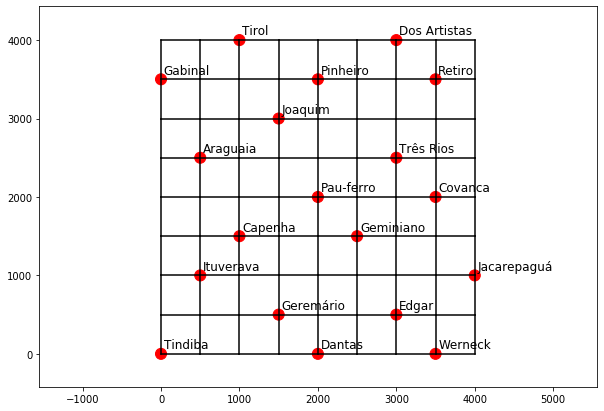

Figure 1: Map of the 'map_grig' file, that is being used in this notebook as the track/station system the trains transit in


In [5]:
# Loading map

print("Reading map file (%s)" % mapPath)

# Getting CSV file names
graphInfo = "%s/Sheet 1-Graph Info.csv" % mapPath
vertices = "%s/Sheet 1-Vertices Positions.csv" % mapPath
connections = "%s/Sheet 1-Connection Matrix.csv" % mapPath


# Reading Graph Info table
print("\tGoing over graph info")

nVertices = 0
nEdges = 0
map_size = 0
with open(graphInfo) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=';')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            if not row[0] == "Number of vertices":
                raise Exception("Wrong input file format. See map input format")
            nVertices = int(row[1])
        elif line_count == 1:
            if not row[0] == "Number of connections":
                raise Exception("Wrong input file format. See map input format")
            nEdges = int(row[1])
        else:
            if not row[0] == "Map size":
                raise Exception("Wrong input file format. See map input format")
            map_size = float(row[1])
        line_count += 1
                                
    print("\t - Map contains %d vertices and %d edges" % (nVertices, nEdges))

# Reading Vertices Positions table
print("\tGoing over vertices positions")
                                
vert_pos = []
stoppingPoints = {}
stoppingPointsPos = []
with open(vertices) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=';')
    line_count = -1
    for row in csv_reader:
        if line_count == -1:
            line_count += 1
            continue
        vert_pos += [(float(row[1]), float(row[2]))]
        if row[0][0] != "_":
            stoppingPoints[row[0]] = line_count
            stoppingPointsPos += [(float(row[1]), float(row[2]))]
        line_count += 1
    if line_count != nVertices:
        raise Exception("Wrong input file format. The number of vertices given doesn't match the number of vertices specified")
    print("\t - Got positions of the %d vertices. %d are stations" %
          (nVertices, len(stoppingPoints.keys())))
                                
# Reading Connection Matrix table
print("\tGoing over graph edges")
                                
edges = np.ndarray(shape=(nVertices, nVertices), dtype=float)
edges.fill(-1)
                                
# Availability dictionary
availability = {}
                                
with open(connections) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=';')
    line_count = 0
    edge_count = 0
    for row in csv_reader:
        for i in range(nVertices):
            if row[i] != "":
                edges[line_count][i] = float(row[i])
                if line_count != i:
                    a = max(line_count, i)
                    b = min(line_count, i)
                    availability[ (a, b) ] = True
                if line_count > i:
                    edge_count += 1
        line_count += 1
    if nEdges != edge_count:
        raise Exception("Wrong input file format. Number of edges given doesn't match the specified number")
    print("\t - Read over %d edges in graph" % edge_count)

    
# Printing the map
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1, 1, 1)
ax.axis('equal')

nEdgesDrawn = 0
for i in range(nVertices):
    for j in range(nVertices):
        if j >= i:
            break
        if edges[i][j] > 0:
            ax.plot([vert_pos[i][0], vert_pos[j][0]], [vert_pos[i][1], vert_pos[j][1]], 'k', zorder=-4)
            nEdgesDrawn += 1

xmin, xmax, ymin, ymax = ax.axis()
scale = (ymax-ymin) * .016  # Scale fator to print visible circles
for ponto in stoppingPoints.keys():
    pos = vert_pos[stoppingPoints[ponto]]
    c = plt.Circle(pos, radius=scale, color='r', zorder=-5)
    ax.add_patch(c)
    ax.text(pos[0] + scale*.5, pos[1] + scale, ponto, fontsize=12, wrap=True, zorder=-3)

xmin, xmax, ymin, ymax = ax.axis()
diverge = .05
xmin = xmin - (xmax - xmin) * diverge
xmax = xmax + (xmax - xmin) * diverge
ymin = ymin - (ymax - ymin) * diverge
ymax = ymax + (ymax - ymin) * diverge
ax.axis([xmin, xmax, ymin, ymax])

plt.show()
print("Figure 1: Map of the 'map_grig' file, that is being used in this notebook as the track/station system the trains transit in")

In [6]:
# Auxiliary objects

class Simulation:
    def __init__(self):
        self.devices = []
        self.clientRange = map_size * client_range
        self.trainRange = 3 * map_size * client_range
        
sim = Simulation()
net = Network(sim, log=False)

clientList = []

***

## Simulation loop

In [7]:
# logFile = open(logName, "w")

waitingTime = {}
answerTime = {}
deliveryTime = {}

sim.devices = []

for key in availability.keys():
    availability[key] = True

# Creating train objects

v_step = step_speed

for i in range(n_Trains):
    tr = Train(i, train_positions[i], v_step, mapPath, availability, net, vMax = trainSpeed, log=True)
    sim.devices += [tr]

# Creating initial client conditions
nClients = 0
currCli = 0.5
clientList = []
outingClients = {}

# Looping simulation

simTime = 0
out_file = ""
finished = False

while not finished:
    clockcount = simTime * v_step
    clockcount = float(clockcount)
    hour = int(clockcount // 3600)
    clockcount %= 3600
    minutes = int(clockcount // 60)
    clockcount %= 60
    seconds = int (clockcount)
    print( "Simulation counter: {:02d}:{:02d}:{:02d} ({} iterations)".
                                format(hour, minutes, seconds, simTime) )

    # Creating random clients
    if currCli < total_clients_finished:
        r = client_creation[simTime]
        if r == 1:
            init = client_position[simTime]
            fin = client_destination[simTime]
            if fin == init:
                fin += 1
                if fin == len(stoppingPointsPos):
                    fin = 0
            pos = stoppingPointsPos[init]
            dest = stoppingPointsPos[fin]
            cl = Client(currCli, pos, dest, v_step, mapPath, net, log=True)
            sim.devices += [cl]
            clientList += [cl]
            currCli += 1

    # Run all devices
    for device in sim.devices:
        device.step()

    for client in clientList:
        # Remove clients from list
        if client.mode == CliModes.dropoff:
            if client not in outingClients.keys():
                outingClients[client] = 0
            else:
                outingClients[client] += 1
            if outingClients[client] >= 10:
                # Getting client waiting time statistics
                waitingTime[client.id] = client.waitingTime
                answerTime[client.id] = client.timeTillRequest
                deliveryTime[client.id] = client.serviceTime

                # Removing client from simulation
                sim.devices.remove(client)
                clientList.remove(client)
                client.kill()
                nClients += 1

    # Simulation log
    out_file += "Simulation step {}, timer {}\n".format(simTime, simTime*v_step)
    for device in sim.devices:
        out_file += "\tDevice {}, mode {}: position {}\n".format(device.id, device.mode, device.pos)
        if isinstance(device, Train):
            out_file += "\t  Processing request {}\n".format(device.unprocessedReqs)
            out_file += "\t  Path {}\n".format(device.path)
            out_file += "\t  Goals (current goal is {}) {}\n".format(device.currentGoal, device.goals)
            out_file += "\t  In course clients {}\n".format(device.inCourseClients)
            out_file += "\t  Clients list {}\n".format(device.client)
        elif isinstance(device, Client):
            out_file += "\t  Destination: {}.\n".format(device.destiny)
            out_file += "\t  Train that will pick me up {}\n".format(device.train)
    out_file += "\n"

    # Simulation step counter
    simTime += 1

    # Check for simulation closure
    if total_steps_run != -1:
        if simTime >= total_steps_run:
            finished = True
    elif nClients != -1:
        if nClients >= total_clients_finished:
            finished = True

print("Finished simulation!")
out_file += "The end"

# logFile.write(out_file)


# Waiting time statistics

print("Total time waited by clients: {}".format(waitingTime))
print("Time waited by clients until they got a train answer: {}".format(answerTime))

print("Non serviced clients: ")
for client in clientList:
    if client.mode not in [CliModes.moving, CliModes.dropoff]:
        print("Client {} is in mode {} and has a total waiting time of {} simulation counts".\
              format(client.id, client.mode, client.waitingTime))


# Average waiting time
sumTime = 0
for value in waitingTime.values():
    sumTime += value

waitTime = sumTime/len(waitingTime.keys())

sumTime = 0
for value in answerTime.values():
    sumTime += value

answTime = sumTime/len(answerTime.keys())

sumTime = 0
for value in deliveryTime.values():
    sumTime += value

deliTime = sumTime/len(deliveryTime.keys())

# TODO: Make version that is normalized by distance!

print("Average waiting time for {} trains: {}".format(n_Trains, waitTime))
print("Serviced {} clients in {} simulation counts\n".format(len(waitingTime.keys()), simTime))

# Train distances
sumDistance = 0
for dev in sim.devices:
    if isinstance(dev, Train):
        sumDistance += dev.totalDistanceRun

# logFile.close()

 Train 0: Reading map file (../TR.AI.NS/map_grid)
 Train 0: Going over graph info
 Train 0:  - Map contains 81 vertices and 144 edges
 Train 0: Going over vertices positions
 Train 0: - Got positions of the 81 vertices
 Train 0: Going over graph edges
 Train 0: - Read over 144 edges in graph
 Train 1: Reading map file (../TR.AI.NS/map_grid)
 Train 1: Going over graph info
 Train 1:  - Map contains 81 vertices and 144 edges
 Train 1: Going over vertices positions
 Train 1: - Got positions of the 81 vertices
 Train 1: Going over graph edges
 Train 1: - Read over 144 edges in graph
Simulation counter: 00:00:00 (0 iterations)
Simulation counter: 00:00:02 (1 iterations)
Simulation counter: 00:00:04 (2 iterations)
Simulation counter: 00:00:06 (3 iterations)
  Client 0.5: Created client in (500.0, 1000.0), with destination (3000.0, 2500.0)
  Client 0.5: Sending request.
Simulation counter: 00:00:08 (4 iterations)
 Train 0: Received message 'req'
 Train 0: Processing Client 0.5 Request
 Train 

 Train 1: Reached goal (1500.0, 3000.0)
 Train 1: Reached destination. Sending message to notify client
  Client 2.5: Getting off train
Simulation counter: 00:10:06 (303 iterations)
 Train 1: Waiting for client to disembark (2.5)
Simulation counter: 00:10:08 (304 iterations)
 Train 1: Waiting for client to disembark (2.5)
Simulation counter: 00:10:10 (305 iterations)
 Train 1: Waiting for client to disembark (2.5)
Simulation counter: 00:10:12 (306 iterations)
 Train 1: Waiting for client to disembark (2.5)
Simulation counter: 00:10:14 (307 iterations)
 Train 1: Waiting for client to disembark (2.5)
Simulation counter: 00:10:16 (308 iterations)
Simulation counter: 00:10:18 (309 iterations)
Simulation counter: 00:10:20 (310 iterations)
Simulation counter: 00:10:22 (311 iterations)
Simulation counter: 00:10:24 (312 iterations)
  Client 2.5: Command for Killing Me
Simulation counter: 00:10:26 (313 iterations)
Simulation counter: 00:10:28 (314 iterations)
Simulation counter: 00:10:30 (315 i

***

## Result

In [8]:
print("Average answer time:", answTime, " (", answerTime, ")")
print("Average pick-up time:", waitTime, " (", waitingTime, ")")
print("Average delivery time:", deliTime, " (", deliveryTime, ")")
print("Average train distance traversed:", sumDistance)

Average answer time: 26.0  ( {0.5: 28, 1.5: 24, 2.5: 27, 3.5: 25} )
Average pick-up time: 96.5  ( {0.5: 67, 1.5: 80, 2.5: 79, 3.5: 160} )
Average delivery time: 184.25  ( {0.5: 180, 1.5: 180, 2.5: 174, 3.5: 203} )
Average train distance traversed: 17000.0


Running with v4.1:

    - Average answer time: 26.0  ( {0.5: 28, 1.5: 24, 2.5: 27, 3.5: 25} )
    - Average pick-up time: 96.5  ( {0.5: 67, 1.5: 80, 2.5: 79, 3.5: 160} )
    - Average delivery time: 184.25  ( {0.5: 180, 1.5: 180, 2.5: 174, 3.5: 203} )
    - Average train distance traversed: 17000.0
   
Running with v3.4:

    - Average answer time: 28.0  ( {0.5: 28, 1.5: 28, 2.5: 28, 3.5: 28} )
    - Average pick-up time: 124.25  ( {0.5: 67, 1.5: 106, 2.5: 148, 3.5: 176} )
    - Average delivery time: 209.75  ( {0.5: 175, 1.5: 201, 2.5: 244, 3.5: 219} )
    - Average train distance traversed: 24000.0
    
####           |===> Melhora com a nova versão